<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Linear Regression

In this notebook we will learn how to train a linear regression model and make predictions with it using the <a href="https://scikit-learn.org/stable/" target="_blank">scikit-learn</a> library. 


A linear regression model is used to explain a certain variable $y$, based on a scalar variable $x$, or based on several variables ($x_1, x_2, \dots, x_n$) that we will represent in vector form as $\mathbf{x}$. In the first case, when the input is a single scalar variable $x \in \mathbb{R}$, we talk about univariate linear regression; and in the second case, when the input is $\mathbf{x} \in \mathbb{R}^n$, multivariate linear regression. As its name suggests, the model we will use in both cases is a linear function of the input variables.

**Note**: If you are running this in [a colab notebook](https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/MNIST.ipynb), you should install the dependencies by running the following cell:

In [1]:
# ! pip install scikit-learn matplotlib

First we load the California housing dataset.

In [2]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()
california_housing_X = california_housing.data
california_housing_y = california_housing.target
feature_names = california_housing.feature_names
print(feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


### Univariate linear regression

To simulate a univariate regression task we are going to use only one of the input features in the dataset: the average number of rooms per household (AveRooms).

Then we split the dataset in two sets for training and test respectively.

In [3]:
from sklearn.model_selection import train_test_split

# Use only one feature
new_X = california_housing_X[:, 2:3]

# Split the data into training/testing sets
california_housing_X_train, california_housing_X_test, california_housing_y_train, california_housing_y_test = train_test_split(new_X, california_housing_y, test_size=0.2, random_state=123)

print(california_housing_X_train.shape, california_housing_X_test.shape, california_housing_y_train.shape, california_housing_y_test.shape)

(16512, 1) (4128, 1) (16512,) (4128,)


Now we create an instance of the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression"><code>sklearn.linear_model.LinearRegression</code></a> class, and fit the model to our data with the <code>fit()</code> method. 

In [4]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = LinearRegression()
# Train the model using the training sets
regr.fit(california_housing_X_train, california_housing_y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


The fitted model can now be used to make predictions using the <code>predict()</code> method.

In [5]:
# Make predictions using the testing set
california_housing_y_pred = regr.predict(california_housing_X_test)

Finally we can evaluate the performance of the model using the Mean Squared Error, and visualize the learned model as follows:

Mean squared error: 1.30


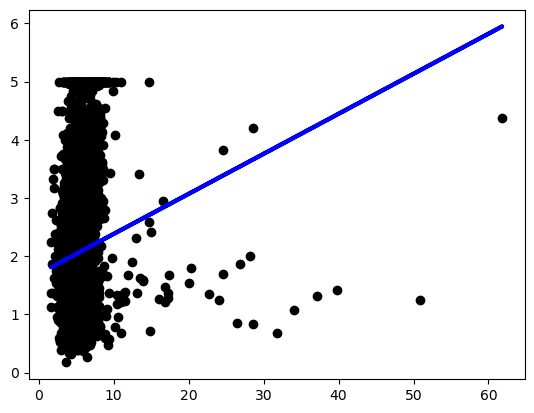

In [6]:
from sklearn.metrics import mean_squared_error

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(california_housing_y_test, california_housing_y_pred))


import matplotlib.pylab as plt

# Plot outputs
plt.scatter(california_housing_X_test, california_housing_y_test,  color='black')
plt.plot(california_housing_X_test, california_housing_y_pred, color='blue', linewidth=3)

Once the model has been trained we can get the estimated coefficients and the independent term  for the linear model as follows:

In [7]:
print(regr.coef_, regr.intercept_)

[0.06874949] 1.6968926599143583


### Multivariate linear regression

For the multivariate case we can use all the 8 available input features.

In [8]:
# Split the data into training/testing sets (now using all features)
california_housing_X_train, california_housing_X_test, california_housing_y_train, california_housing_y_test = train_test_split(california_housing_X, california_housing_y, test_size=0.2, random_state=123)

print(california_housing_X_train.shape, california_housing_X_test.shape, california_housing_y_train.shape, california_housing_y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


The rest is exactly the same as in the univariate case. In this case we expect the MSE to be lower, since we have more discriminative information for learning a better model.

In [9]:
# Train the model using the training sets
regr.fit(california_housing_X_train, california_housing_y_train)

# Make predictions using the testing set
california_housing_y_pred = regr.predict(california_housing_X_test)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(california_housing_y_test, california_housing_y_pred))

Mean squared error: 0.52


Once the model has been trained we can get the estimated coefficients and the independent term  for the linear model as follows:

In [10]:
print(regr.coef_, regr.intercept_)

[ 4.39988248e-01  9.15770358e-03 -1.11827735e-01  6.47857908e-01
 -6.55068105e-06 -3.92330215e-03 -4.17033805e-01 -4.27676550e-01] -36.25561939898499
